In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Membaca dataset
df = pd.read_csv(r"C:\Users\OPTION\Downloads\Python DA\[BELUM] Project 3_Jobs Salaries Analytics\ds_salaries.csv")
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (607, 12)


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
# Salin dataset asli untuk perbandingan
df_before = df.copy()

# --- Deteksi dan Hapus Duplikat ---
print("Jumlah baris sebelum menghapus duplikat:", df.shape[0])
df = df.drop_duplicates()
print("Jumlah baris sesudah menghapus duplikat:", df.shape[0])

# --- Deteksi dan Hapus Missing Values ---
print("Jumlah missing values per kolom sebelum cleaning:\n", df.isnull().sum())
df = df.dropna()
print("Jumlah missing values per kolom sesudah cleaning:\n", df.isnull().sum())

Jumlah baris sebelum menghapus duplikat: 607
Jumlah baris sesudah menghapus duplikat: 607
Jumlah missing values per kolom sebelum cleaning:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Jumlah missing values per kolom sesudah cleaning:
 Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


In [7]:
# --- Deteksi dan Hapus Outliers ---
# Misal: Menggunakan IQR untuk kolom 'salary' dan 'salary_in_usd'
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

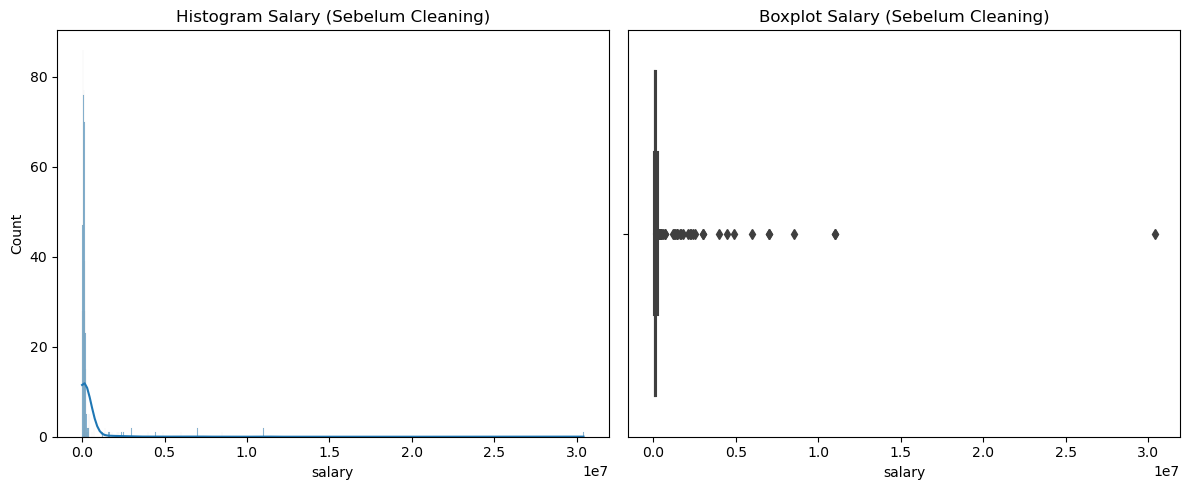

In [8]:
# Sebelum outlier removal, kita tampilkan histogram dan boxplot untuk perbandingan
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_before['salary'], kde=True)
plt.title("Histogram Salary (Sebelum Cleaning)")
plt.subplot(1, 2, 2)
sns.boxplot(x=df_before['salary'])
plt.title("Boxplot Salary (Sebelum Cleaning)")
plt.tight_layout()
plt.show()

In [9]:
# Hapus outlier untuk 'salary' dan 'salary_in_usd'
df = remove_outliers(df, 'salary')
df = remove_outliers(df, 'salary_in_usd')

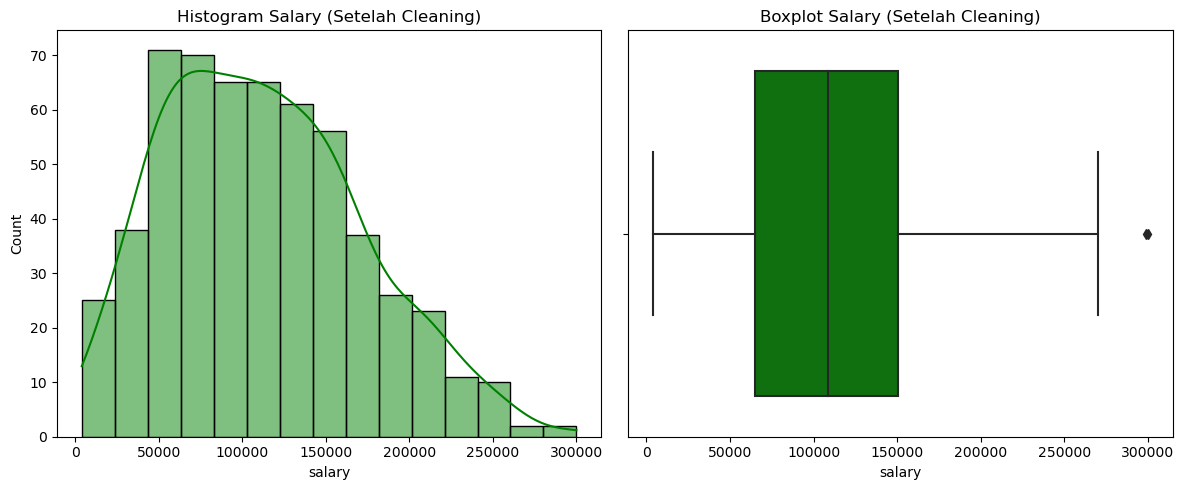

In [10]:
# Visualisasi setelah cleaning
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['salary'], kde=True, color='green')
plt.title("Histogram Salary (Setelah Cleaning)")
plt.subplot(1, 2, 2)
sns.boxplot(x=df['salary'], color='green')
plt.title("Boxplot Salary (Setelah Cleaning)")
plt.tight_layout()
plt.show()

In [11]:
# Membandingkan jumlah baris sebelum dan sesudah cleaning
print("Jumlah baris sebelum cleaning:", df_before.shape[0])
print("Jumlah baris sesudah cleaning:", df.shape[0])

Jumlah baris sebelum cleaning: 607
Jumlah baris sesudah cleaning: 562


In [12]:
# Menyimpan dataset yang telah dibersihkan ke file CSV baru
cleaned_filename = "ds_salaries-CLEANED.csv"
df.to_csv(cleaned_filename, index=False)
print("Dataset yang telah dibersihkan disimpan sebagai:", cleaned_filename)

Dataset yang telah dibersihkan disimpan sebagai: ds_salaries-CLEANED.csv


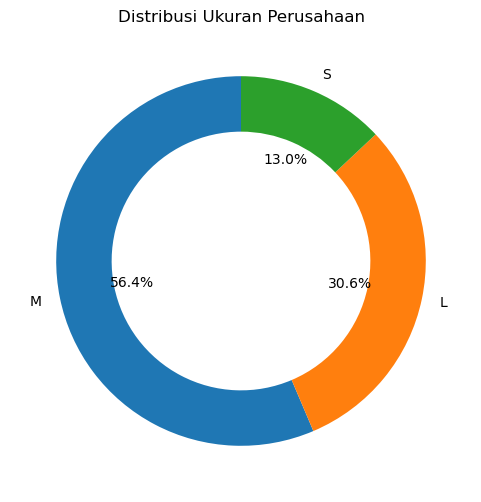

In [13]:
# Visualisasi menggunakan Matplotlib dan Seaborn

# 1. Ring Chart (Donut Chart) - Perusahaan Berdasarkan Ukuran (company_size)
plt.figure(figsize=(6,6))
size_counts = df['company_size'].value_counts()
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title("Distribusi Ukuran Perusahaan")
plt.show()

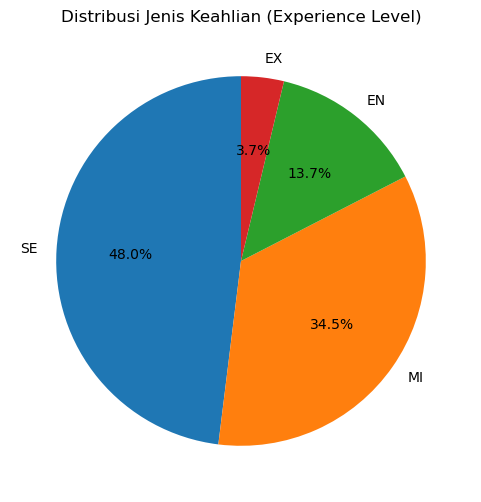

In [14]:
# 2. Pie Chart - Jenis Keahlian (menggunakan kolom 'experience_level')
plt.figure(figsize=(6,6))
exp_counts = df['experience_level'].value_counts()
plt.pie(exp_counts, labels=exp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Jenis Keahlian (Experience Level)")
plt.show()

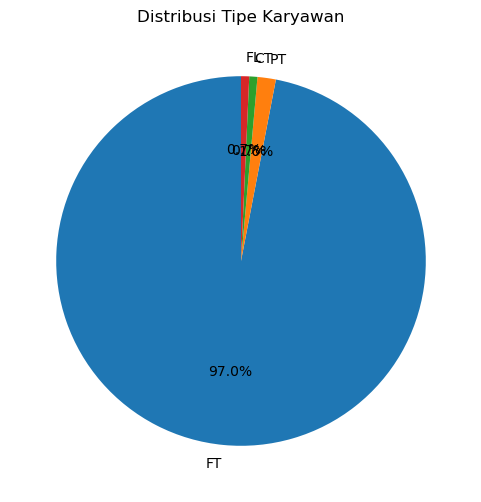

In [15]:
# 3. Pie Chart - Tipe Karyawan (employment_type)
plt.figure(figsize=(6,6))
emp_counts = df['employment_type'].value_counts()
plt.pie(emp_counts, labels=emp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Tipe Karyawan")
plt.show()

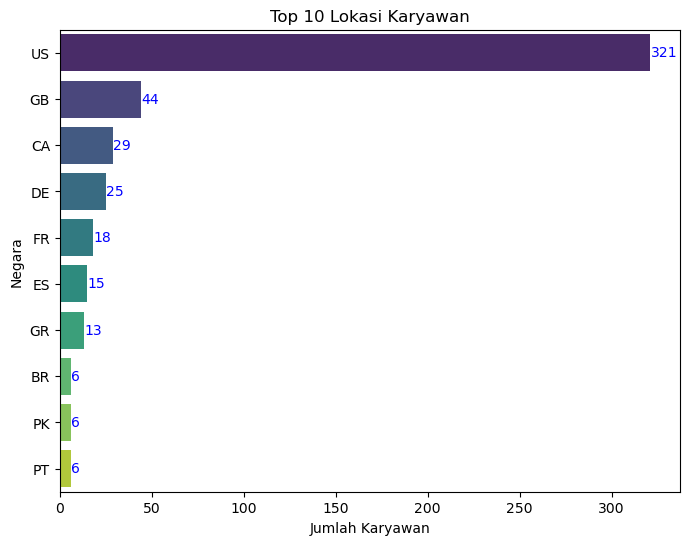

In [16]:
# 4. Horizontal Bar Chart - Top 10 Lokasi Karyawan (employee_residence)
top10_locations = df['employee_residence'].value_counts().head(10)
plt.figure(figsize=(8,6))
ax = sns.barplot(x=top10_locations.values, y=top10_locations.index, palette='viridis')
for i, v in enumerate(top10_locations.values):
    ax.text(v + 0.2, i, str(v), color='blue', va='center')
plt.title("Top 10 Lokasi Karyawan")
plt.xlabel("Jumlah Karyawan")
plt.ylabel("Negara")
plt.show()

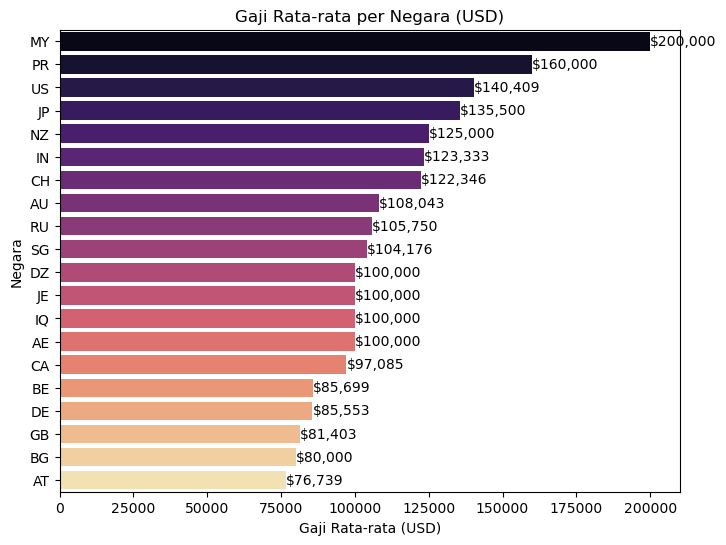

In [20]:
# 5. Horizontal Bar Chart - Gaji Rata-rata per Negara (employee_residence)
avg_salary_country = df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(8,6))
ax = sns.barplot(x=avg_salary_country.values, y=avg_salary_country.index, palette='magma')
for i, v in enumerate(avg_salary_country.values):
    ax.text(v + 50, i, f"${v:,.0f}", color='black', va='center')
plt.title("Gaji Rata-rata per Negara (USD)")
plt.xlabel("Gaji Rata-rata (USD)")
plt.ylabel("Negara")
plt.show()

In [18]:
# 6. List Gaji Berdasarkan Job Title, Pengalaman dan Tipe Karyawan
# Menghitung rata-rata gaji berdasarkan job_title, experience_level, dan employment_type
salary_group = df.groupby(['job_title', 'experience_level', 'employment_type'])['salary_in_usd'].mean().reset_index()
salary_group = salary_group.sort_values(by='salary_in_usd', ascending=False)
print("Rata-rata Gaji Berdasarkan Job Title, Experience Level, dan Employment Type:")
print(salary_group.head(10))

Rata-rata Gaji Berdasarkan Job Title, Experience Level, dan Employment Type:
                                    job_title experience_level  \
83                                ML Engineer               MI   
84                                ML Engineer               SE   
68                               Head of Data               EX   
94                 Machine Learning Scientist               EN   
41                              Data Engineer               EX   
97                 Machine Learning Scientist               SE   
54                       Data Science Manager               MI   
5                          Analytics Engineer               SE   
92   Machine Learning Infrastructure Engineer               SE   
102                   Principal Data Engineer               SE   

    employment_type  salary_in_usd  
83               CT  270000.000000  
84               FT  256000.000000  
68               FT  232500.000000  
94               FT  225000.000000  
41         

In [19]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Membuat beberapa figure dengan Plotly
# fig_company_size = px.pie(df, names='company_size', title="Ukuran Perusahaan", hole=0.4)
# fig_experience = px.pie(df, names='experience_level', title="Experience Level")
# fig_employment = px.pie(df, names='employment_type', title="Employment Type")
# top10_locations_df = df['employee_residence'].value_counts().head(10).reset_index()
# top10_locations_df.columns = ['employee_residence', 'count']
# fig_locations = px.bar(top10_locations_df, x='count', y='employee_residence', orientation='h', title="Top 10 Lokasi Karyawan")
# avg_salary_df = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index().sort_values(by='salary_in_usd', ascending=False)
# fig_avg_salary = px.bar(avg_salary_df, x='salary_in_usd', y='employee_residence', orientation='h', title="Gaji Rata-rata per Negara (USD)")

# # Inisialisasi aplikasi Dash
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Dashboard Data Salaries"),
#     html.Div([
#         dcc.Graph(figure=fig_company_size),
#         dcc.Graph(figure=fig_experience),
#         dcc.Graph(figure=fig_employment)
#     ], style={'display': 'flex', 'flexWrap': 'wrap'}),
#     html.Div([
#         dcc.Graph(figure=fig_locations),
#         dcc.Graph(figure=fig_avg_salary)
#     ], style={'display': 'flex', 'flexWrap': 'wrap'}),
#     html.H2("Rata-rata Gaji Berdasarkan Job Title, Experience, dan Employment Type"),
#     html.Div([
#         html.Pre(salary_group.to_string(index=False))
#     ], style={'overflowX': 'scroll', 'backgroundColor': '#f4f4f4', 'padding': '10px'})
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
